In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/Users/chitrakshsingh/Desktop/Instagram data.csv', encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [4]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


/var/folders/x4/h36b41315x78nvy7prmfg47h0000gn/T/ipykernel_33499/4127021947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


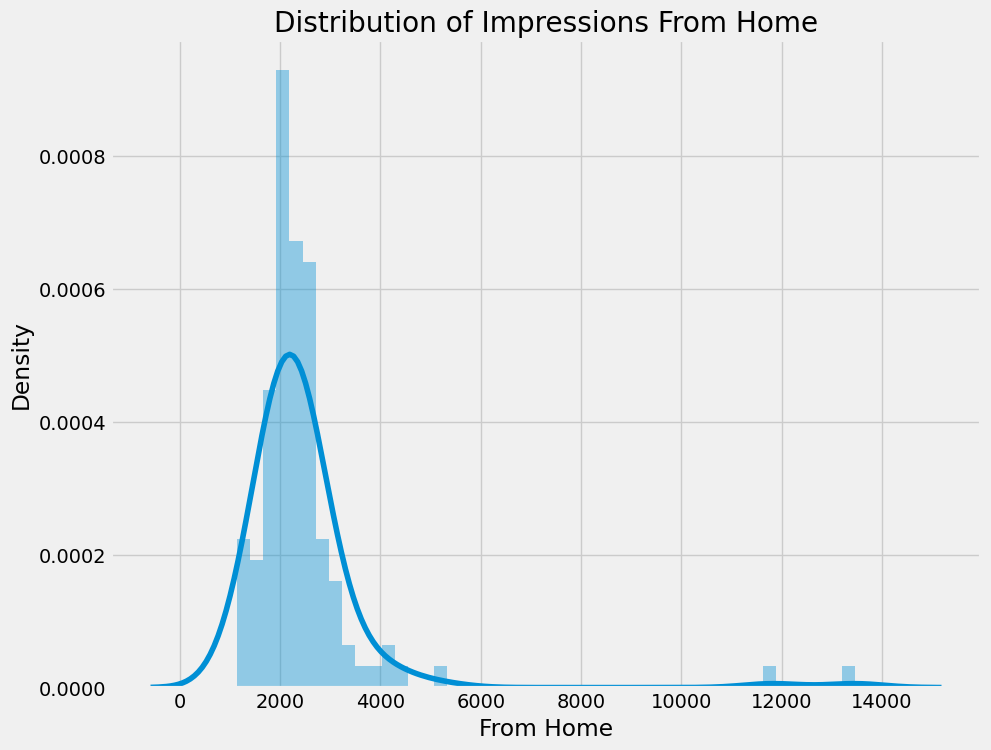

In [16]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

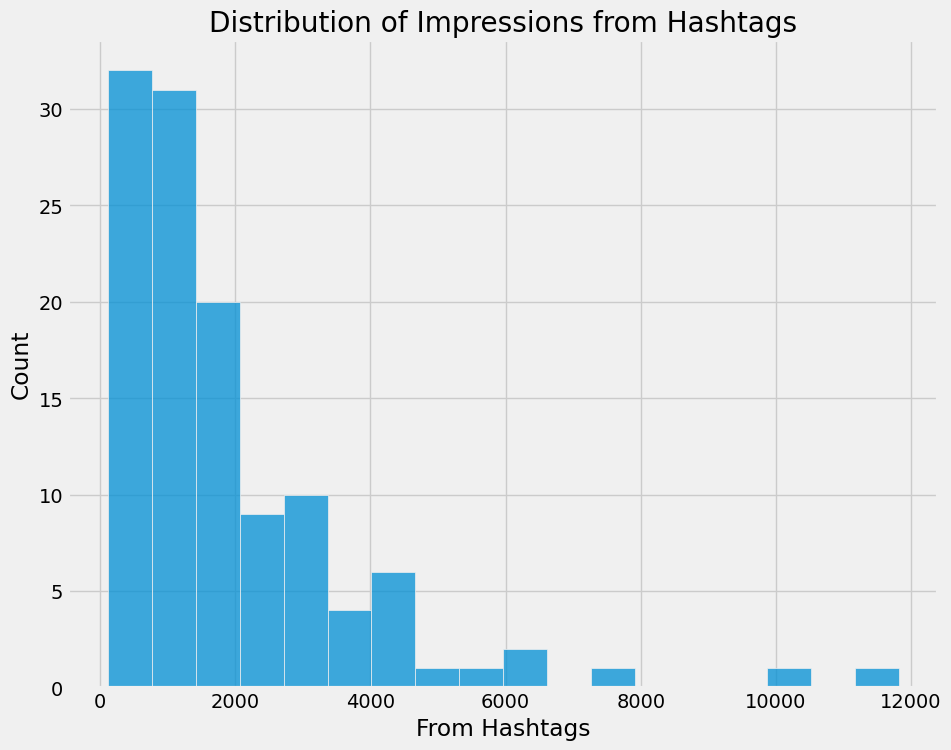

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

/var/folders/x4/h36b41315x78nvy7prmfg47h0000gn/T/ipykernel_33499/3861004323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


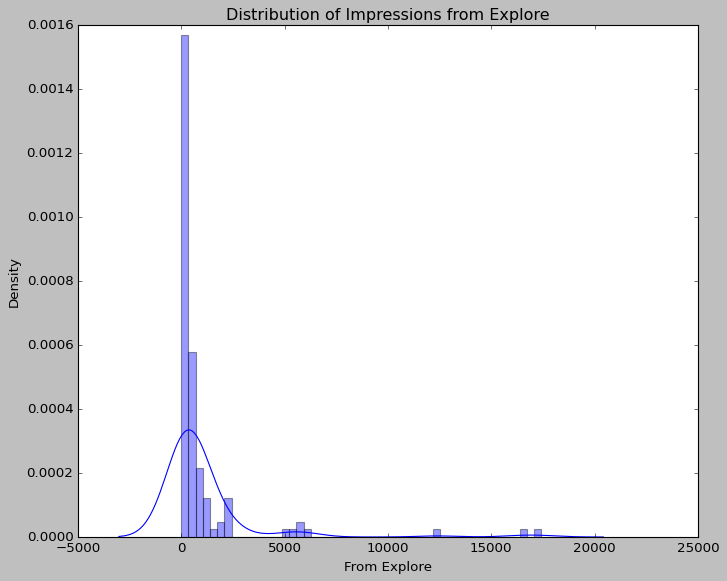

In [18]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

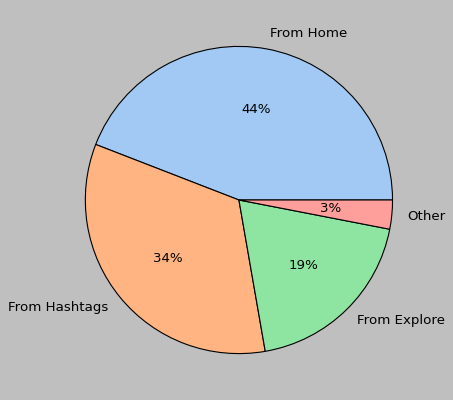

In [19]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
palette_color = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

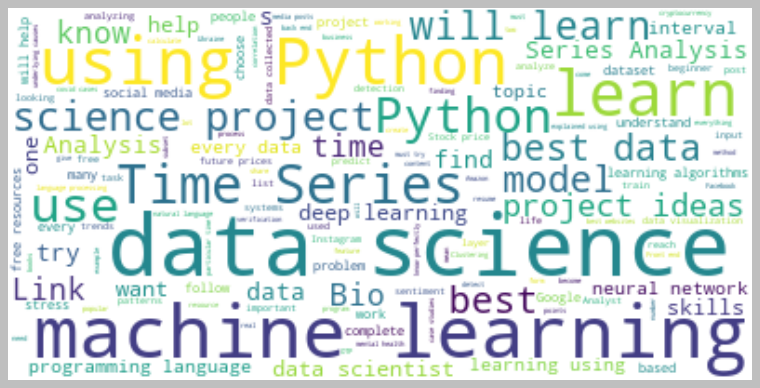

In [20]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

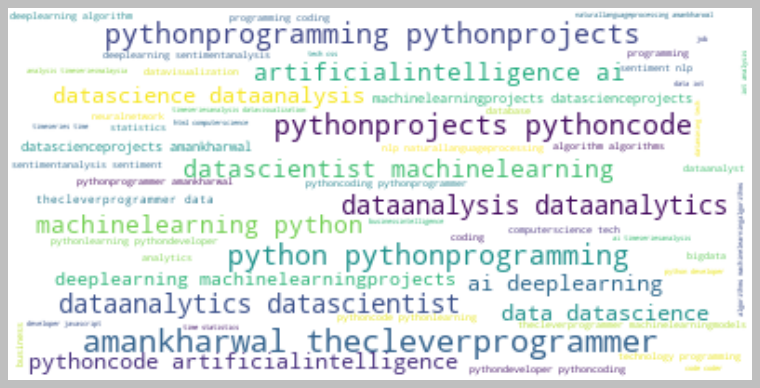

In [21]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

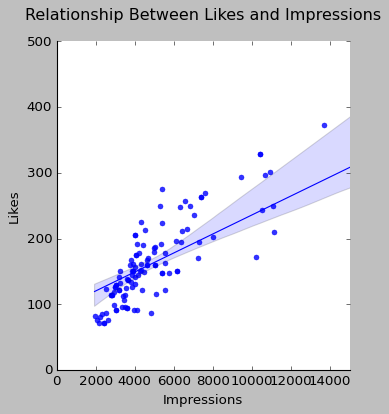

In [22]:
sns.lmplot(data=data, x="Impressions", y="Likes", fit_reg=True, scatter_kws={"s": 20}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Likes and Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 500)
plt.show()

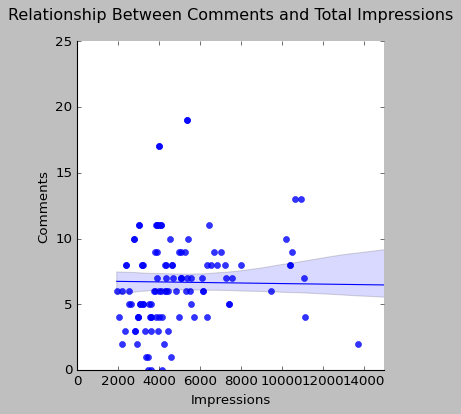

In [23]:
sns.lmplot(data=data, x="Impressions", y="Comments", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Comments and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 25)
plt.show()

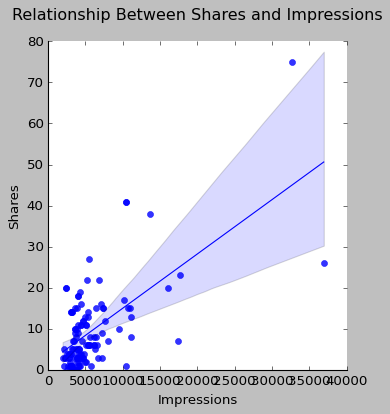

In [24]:
sns.lmplot(data=data, x="Impressions", y="Shares", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Shares and Impressions", pad=20)
plt.ylim(0, 80)
plt.xlim(0, 40000)
plt.show()

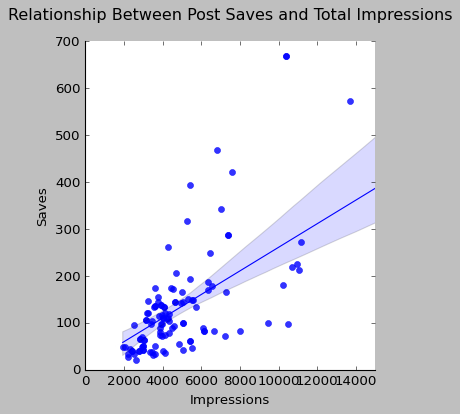

In [25]:
sns.lmplot(data=data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 700)
plt.show()

In [26]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
data_numeric = data.drop(non_numeric_columns, axis=1)

# Now calculate the correlation
correlation = data_numeric.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Non-numeric columns: Index(['Caption', 'Hashtags'], dtype='object')
Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [27]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


Text(0.5, 1.0, 'Relationship Between Profile Visits and Followers Gained')

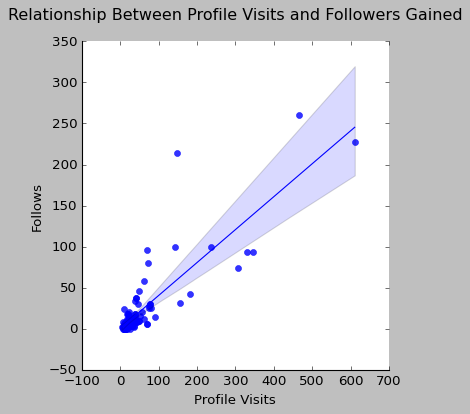

In [28]:
sns.lmplot(data=data, x="Profile Visits", y="Follows", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Profile Visits and Followers Gained", pad=20)

In [30]:
X = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7877555738036934

In [32]:
# @title
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([14972.27893071])

Number of posts with the hashtag #python: 109
Total impressions from posts with #python: 578243


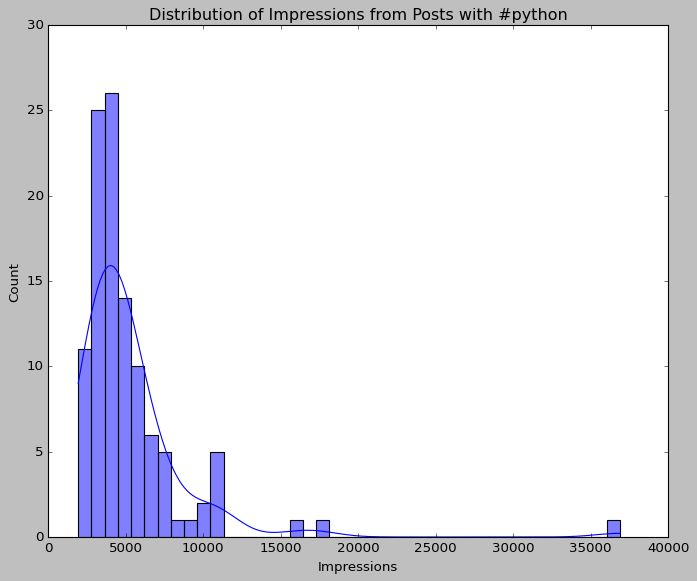

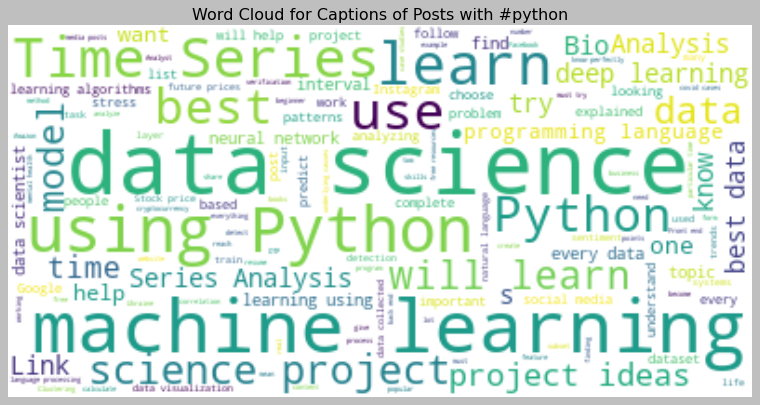

In [36]:
# Function to analyze reach based on hashtag input
def analyze_hashtag_reach(hashtag):
    # Filter the dataset by the given hashtag
    filtered_data = data[data['Hashtags'].str.contains(hashtag, na=False)]

    # Check if any data was found with the hashtag
    if filtered_data.empty:
        print(f"No posts found with the hashtag #{hashtag}")
        return

    print(f"Number of posts with the hashtag #{hashtag}: {len(filtered_data)}")

    # Analyze the impressions for posts with this hashtag
    total_impressions = filtered_data['Impressions'].sum()
    print(f"Total impressions from posts with #{hashtag}: {total_impressions}")

    # Visualize the distribution of impressions
    plt.figure(figsize=(10, 8))
    plt.title(f"Distribution of Impressions from Posts with #{hashtag}")
    sns.histplot(filtered_data['Impressions'], kde=True)
    plt.show()

    # Generate a word cloud for captions related to this hashtag
    text = " ".join(i for i in filtered_data.Caption)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Captions of Posts with #{hashtag}")
    plt.show()

# Get user input for the hashtag
hashtag_input = input("Enter a hashtag to analyze (without #): ")
analyze_hashtag_reach(hashtag_input)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming you've already split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_score = linear_model.score(X_test_scaled, y_test)
print(f"Linear Regression Accuracy: {linear_score:.2f}")

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)
tree_score = tree_model.score(X_test_scaled, y_test)
print(f"Decision Tree Regressor Accuracy: {tree_score:.2f}")



Linear Regression Accuracy: 0.88
Decision Tree Regressor Accuracy: 0.95


In [38]:
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

fig_likes = px.bar(likes_distribution, x='Hashtag', y='Likes',
                   title='Likes Distribution for Each Hashtag')

fig_impressions = px.bar(impressions_distribution, x='Hashtag',
                         y='Impressions',
                         title='Impressions Distribution for Each Hashtag')

fig_likes.show()
fig_impressions.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Import train_test_split if not already imported
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)
# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = linear_model.predict(X_test_scaled)
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Linear Regression Model Metrics:
Mean Squared Error (MSE): 4746059.12
R-squared (R2): 0.88


In [40]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)
# Metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression Model Metrics:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R-squared (R2): {r2_tree:.2f}")


Decision Tree Regression Model Metrics:
Mean Squared Error (MSE): 2111040.67
R-squared (R2): 0.95


In [41]:
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load your dataset (replace with your actual dataset loading code)
data = pd.read_csv('/Users/chitrakshsingh/Desktop/Instagram data.csv', encoding='latin1')

# Assuming X and y are defined appropriately from your dataset
X = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = data['Impressions']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {
    'Model': [],
    'Mean Squared Error (MSE)': [],
    'R-squared (R2)': []
}

# Fit each model and evaluate performance
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results['Model'].append(model_name)
    results['Mean Squared Error (MSE)'].append(mse)
    results['R-squared (R2)'].append(r2)

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results table
print("Comparison of Machine Learning Algorithms:")
print(results_df)


Comparison of Machine Learning Algorithms:
                          Model  Mean Squared Error (MSE)  R-squared (R2)
0  Passive Aggressive Regressor              1.722122e+07        0.556586
1             Linear Regression              4.746059e+06        0.877798
2      Decision Tree Regression              2.111041e+06        0.945645
3      Random Forest Regression              4.646768e+06        0.880354


In [42]:
# Import necessary libraries
from sklearn.linear_model import PassiveAggressiveRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define X and y
X = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]  # Features
y = data['Impressions']  # Target variable


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models and their names
models = {
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store performance metrics
metrics = {
    'Model': [],
    'Mean Squared Error (MSE)': [],
    'R-squared (R2)': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Mean Squared Error (MSE)'].append(mse)
    metrics['R-squared (R2)'].append(r2)

# Create a DataFrame for the results
metrics_df = pd.DataFrame(metrics)

# Print the performance metrics for each model
print(metrics_df)


                          Model  Mean Squared Error (MSE)  R-squared (R2)
0  Passive Aggressive Regressor              4.880104e+06        0.874346
1             Linear Regression              4.746059e+06        0.877798
2      Decision Tree Regression              2.111041e+06        0.945645
3      Random Forest Regression              4.646768e+06        0.880354


In [49]:
# =============================
# Hyperparameter Tuning for Random Forest (with Encoding Fix)
# =============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# =============================
# 1. Data Preprocessing
# =============================

# Make a copy of your dataframe (replace 'data' with your actual dataframe variable if different)
df = data.copy()

# Encode all categorical columns (non-numeric)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # store encoder for inverse transform later if needed

# Define features (X) and target (y) - Replace "Impressions" with your actual target column
X = df.drop(columns=['Impressions'])
y = df['Impressions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2. Random Forest + Hyperparameter Tuning
# =============================

rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search (Exhaustive)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')

grid_search.fit(X_train, y_train)

print("Best Parameters (GridSearch):", grid_search.best_params_)
print("Best CV Score (GridSearch):", grid_search.best_score_)

# =============================
# 3. Evaluate on Test Data
# =============================
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest R2 Score:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estim

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=lo